In [15]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering, SpectralClustering

from luwiji.cluster import demo

In [16]:
x1, y1 = demo.blob_data()
x2, y2 = demo.moon_data()
x3, y3 = demo.circle_data()



(-10.985970037990379,
 6.596407079448438,
 -8.951342220000583,
 11.294642755849976)

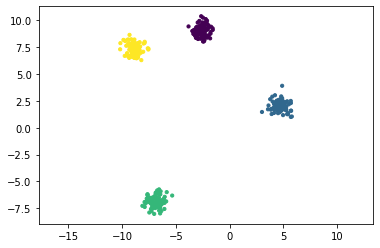

In [17]:
X = x1

plt.scatter(X[:, 0], X[:, 1], c=y1, s=10)
plt.axis('equal')

In [24]:
X

array([[ -9.47854243,   8.20092001],
       [ -3.81907018,   9.42523738],
       [ -8.96119929,   7.18716113],
       [  5.1274387 ,   1.89964099],
       [  4.92532409,   2.5409525 ],
       [ -2.90082427,   8.85325537],
       [ -2.27257881,   8.97787167],
       [ -8.57949825,   6.96065101],
       [ -2.46567409,   8.86478245],
       [  5.36545064,   2.4528051 ],
       [ -8.75289504,   7.23153125],
       [  4.1764136 ,   1.94340701],
       [ -7.89731551,   7.99623294],
       [  4.28222698,   2.31296856],
       [ -7.1234303 ,  -7.09638869],
       [ -6.85536638,  -7.29558465],
       [ -6.6291686 ,  -7.36888722],
       [ -2.56702176,   8.86373428],
       [  4.34519646,   2.39797073],
       [ -6.73473976,  -5.84240919],
       [  4.4039129 ,   2.51764498],
       [ -8.67526125,   6.69796613],
       [ -2.78138899,   9.06974742],
       [  3.01924517,   1.46097586],
       [ -2.60537811,   9.1650598 ],
       [ -9.23356498,   7.55925709],
       [ -6.67290974,  -5.94171169],
 

# Kmeans clustering

In [18]:
kMeans = KMeans(n_clusters=4)

In [19]:
kMeans.fit(X)

KMeans(n_clusters=4)

In [20]:
member = kMeans.fit_predict(X)

In [21]:
member

array([0, 3, 0, 1, 1, 3, 3, 0, 3, 1, 0, 1, 0, 1, 2, 2, 2, 3, 1, 2, 1, 0,
       3, 1, 3, 0, 2, 3, 2, 0, 0, 1, 0, 0, 3, 2, 1, 1, 3, 2, 3, 0, 0, 2,
       1, 1, 3, 2, 3, 1, 3, 0, 2, 1, 1, 0, 1, 3, 0, 1, 2, 1, 0, 2, 3, 3,
       2, 2, 2, 0, 3, 2, 0, 1, 0, 3, 0, 2, 3, 3, 2, 3, 0, 0, 2, 1, 0, 2,
       3, 2, 1, 3, 0, 2, 1, 0, 0, 2, 2, 3, 2, 1, 3, 2, 2, 2, 1, 2, 1, 3,
       3, 0, 1, 1, 0, 0, 0, 1, 0, 3, 2, 1, 0, 3, 0, 2, 2, 1, 2, 3, 3, 3,
       2, 0, 2, 0, 3, 2, 3, 2, 3, 2, 2, 1, 3, 0, 2, 3, 0, 1, 0, 3, 2, 1,
       2, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 0, 2, 0, 0, 0, 0, 3, 2, 2, 2, 1,
       1, 3, 1, 0, 2, 1, 1, 1, 2, 1, 3, 3, 2, 2, 1, 0, 0, 1, 2, 2, 0, 2,
       0, 0, 1, 3, 2, 3, 3, 1, 0, 3, 0, 2, 3, 1, 1, 3, 1, 2, 2, 1, 3, 1,
       2, 3, 3, 1, 2, 3, 2, 3, 2, 3, 2, 3, 1, 0, 0, 2, 0, 0, 1, 2, 3, 3,
       0, 3, 2, 2, 1, 3, 1, 1, 1, 1, 3, 2, 1, 2, 3, 1, 0, 0, 3, 1, 1, 0,
       0, 2, 2, 2, 3, 1, 1, 2, 2, 1, 3, 2, 3, 3, 1, 0, 3, 1, 2, 0, 3, 3,
       0, 0, 0, 1, 1, 0, 1, 1, 2, 0, 3, 3, 1, 0, 0,

In [22]:
kMeans.cluster_centers_

array([[-8.8837694 ,  7.3527418 ],
       [ 4.69349111,  1.99188198],
       [-6.88174949, -6.93204687],
       [-2.57121515,  9.02892796]])